<a href="https://colab.research.google.com/github/diamondleng/Class_Project/blob/main/(CO2_and_Stock_projects)_TimeSeries_Usecase_ShortVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we use Time Series models 



Objective:

How to analyze time series data ?

How to forecast time series data?

# Project 1: Climate Change and CO2 levels prediction
 Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.

 https://gml.noaa.gov/ccgg/trends/index.html


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing libraries
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

from pylab import rcParams

import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#https://drive.google.com/file/d/1JJB4SO5XCq_B3TVbYe57c4RDQ6-xV074

link = 'https://drive.google.com/open?id=1JJB4SO5XCq_B3TVbYe57c4RDQ6-xV074'

In [ ]:
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('co2.csv') 
Co2_df  = pd.read_csv('co2.csv', parse_dates=['date'], index_col='date')
Co2_df.head()

GoogleDriveFile({'id': '1JJB4SO5XCq_B3TVbYe57c4RDQ6-xV074'})


,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


missing data:  co2    59
dtype: int64


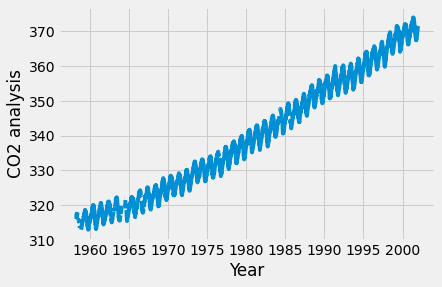

In [ ]:
plt.xlabel('Year')
plt.ylabel('CO2 analysis')
plt.plot(Co2_df)
print("missing data: ", Co2_df.isnull().sum())

In [ ]:
Co2_df 
y = Co2_df['co2'].resample('MS').mean()
y.isnull().sum()

5

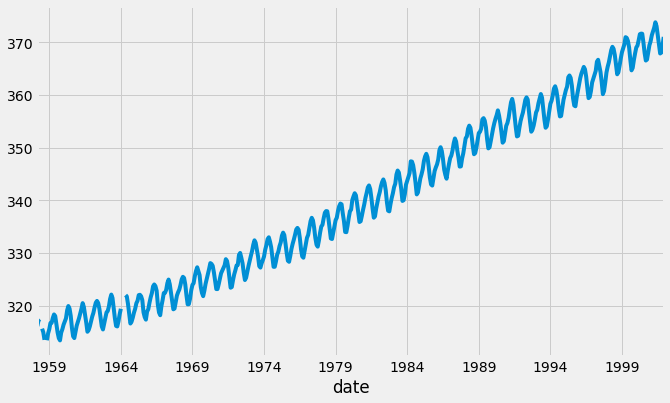

In [ ]:
y.plot(figsize=(10, 6))
plt.show()

In [ ]:
y.head()

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:

y.describe()

count    521.000000
mean     339.822665
std       17.068711
min      313.400000
25%      324.125000
50%      337.950000
75%      354.675000
max      373.800000
Name: co2, dtype: float64

In [ ]:
y.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2001-03-01', '2001-04-01', '2001-05-01', '2001-06-01',
               '2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
               '2001-11-01', '2001-12-01'],
              dtype='datetime64[ns]', name='date', length=526, freq='MS')

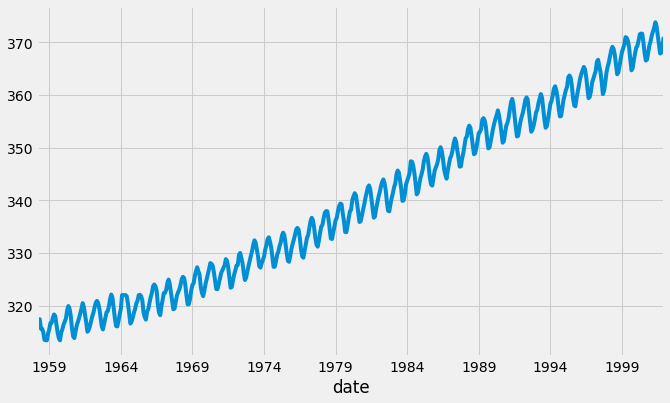

In [ ]:
y = y.fillna(y.bfill())
#y=y.fillna(y.ffill())
y.plot(figsize=(10, 6))
plt.show()

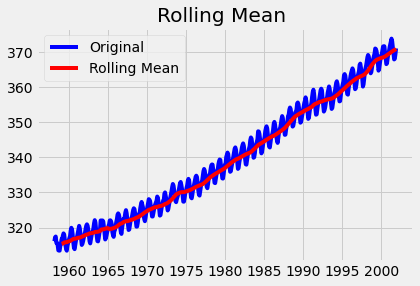

In [ ]:

rollingmean = y.rolling(window=12).mean()
rollingstd = y.rolling(window=12).std()
orig = plt.plot(y, color='blue', label='Original')
mean = plt.plot(rollingmean , color='red', label='Rolling Mean')
#std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.plot(figsize=(10, 6))
plt.legend(loc='best')
plt.title('Rolling Mean ')
plt.show(block=False)


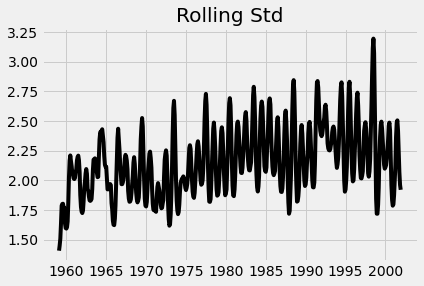

In [ ]:
std = plt.plot(rollingstd, color='black', label='Rolling Std')
plt.title('Rolling Std')
plt.show(block=False)



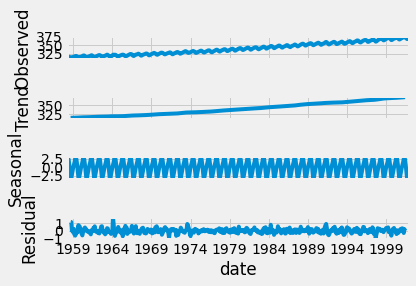

In [ ]:
deco = sm.tsa.seasonal_decompose(y, model='additive')
fig = deco.plot()
plt.show()

In [ ]:
deco.resid.describe()

count    514.000000
mean       0.002790
std        0.298683
min       -0.997063
25%       -0.195065
50%       -0.008551
75%        0.166299
max        1.745334
Name: co2, dtype: float64

In [ ]:
deco.resid.isnull().sum()

12

In [ ]:
CO2Residual = deco.resid
CO2Residual = CO2Residual.fillna(CO2Residual.bfill())
CO2Residual = CO2Residual.fillna(CO2Residual.ffill())

In [ ]:
CO2Residual.describe()

count    526.000000
mean       0.016137
std        0.320423
min       -0.997063
25%       -0.192372
50%       -0.000486
75%        0.169395
max        1.745334
Name: co2, dtype: float64

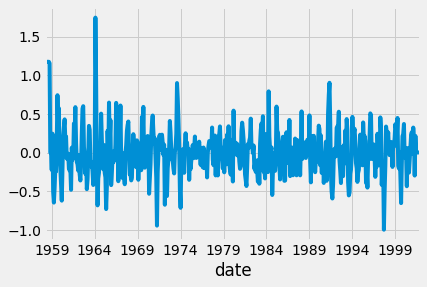

In [ ]:
fig = CO2Residual.plot()
plt.show()

In [ ]:
ADFresult = adfuller(CO2Residual)

In [ ]:
print('ADF Statistic: %f' % NathanADFresult[0])
print('p-value: %f' % NathanADFresult[1])
print('Critical Values:')
for key, value in NathanADFresult[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.181866
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [ ]:
CO2trend = deco.trend
CO2trend = CO2trend.fillna(CO2trend.bfill())
CO2trend = CO2trend.fillna(CO2trend.ffill())
#CO2trend.isnull().sum()
CO2trend

date
1958-03-01    315.375000
1958-04-01    315.375000
1958-05-01    315.375000
1958-06-01    315.375000
1958-07-01    315.375000
                 ...    
2001-08-01    370.787917
2001-09-01    370.787917
2001-10-01    370.787917
2001-11-01    370.787917
2001-12-01    370.787917
Freq: MS, Name: co2, Length: 526, dtype: float64

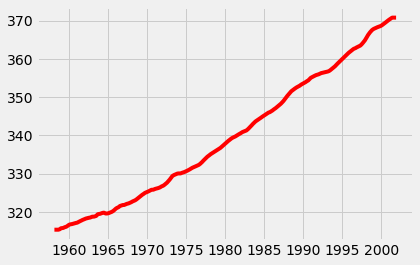

In [ ]:
mean = plt.plot(CO2trend , color='red', label='CO2trend')

In [ ]:
ADFresult = adfuller(CO2trend)

In [ ]:
print('ADF Statistic: %f' % NathanADFresult[0])
print('p-value: %f' % NathanADFresult[1])
print('Critical Values:')
for key, value in NathanADFresult[4].items():
	print('\t%s: %.3f' % (key, value))
#这个值就很不平稳

ADF Statistic: 1.761347
p-value: 0.998269
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


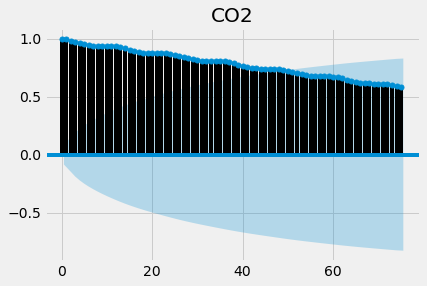

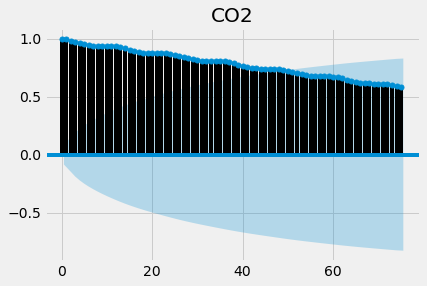

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot_acf(CO2Residual,title="CO2")
plot_acf(y,lags=75,title="CO2")

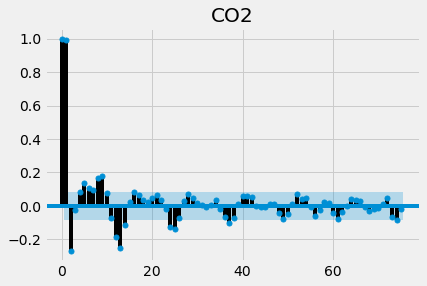

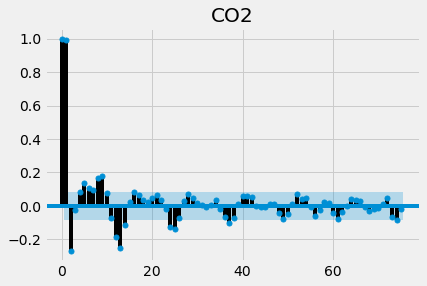

In [ ]:
#plot_pacf(CO2Residual,title="CO2")
plot_pacf(y,lags=75,title="CO2")

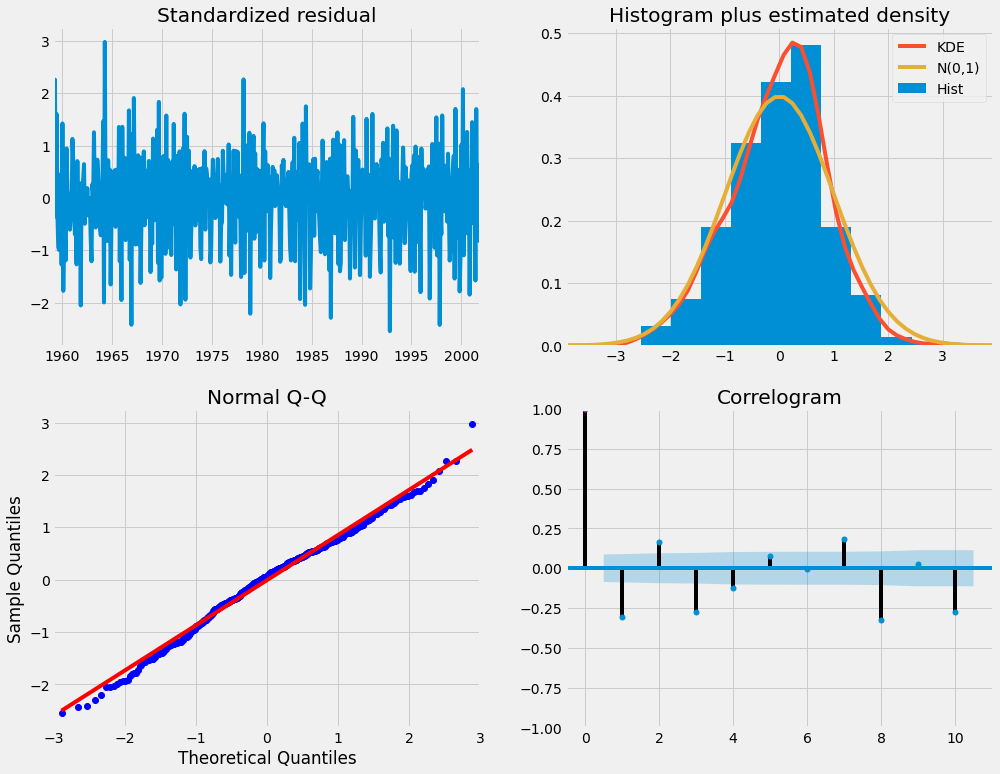

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,seasonal_order=(2, 1, 2, 1),
                                order=(2, 10, 10),
				)

TSresults = mod.fit()

#print(TSresults.summary().tables[1])

TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()

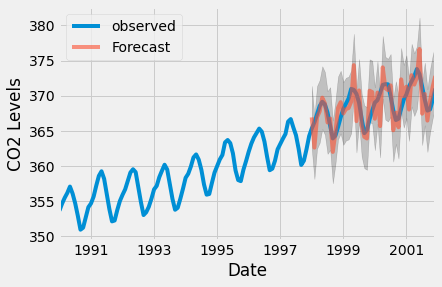

In [ ]:
pred = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters. 

ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()


In [ ]:
pred_ci

,lower co2,upper co2
date,,
1998-01-01,362.458213,371.379310
1998-02-01,358.154906,367.075918
1998-03-01,362.449850,371.370816
1998-04-01,363.307846,372.228797
1998-05-01,365.265142,374.186093
1998-06-01,364.446959,373.367894
1998-07-01,361.729343,370.650220
1998-08-01,362.295988,371.216756
1998-09-01,357.544650,366.465274


In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))



The Mean Squared Error of our forecasts is 4.57


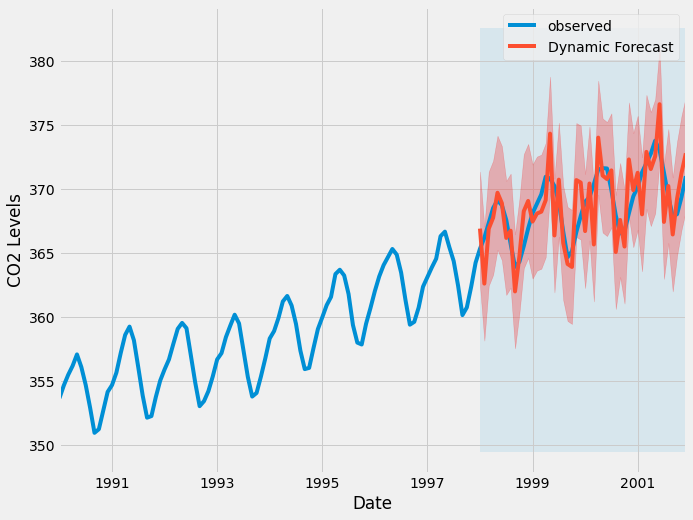

In [ ]:
#pred_dynamic = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False, full_results=True)
pred_dynamic = TSresults.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


ax = y['1990':].plot(label='observed', figsize=(10, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='r', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()


#Project 2: MSFT stock price forecast

## Part 0: Setup Google Drive Environment



In [ ]:
#import pandas as pd
#import numpy as np

from tabulate import tabulate

link = 'https://drive.google.com/open?id=1wdf3FfKdR_xNh2rJeYWL4ye0_FUZ9WM7'


fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
file.GetContentFile('MSFT_Stock.csv') 
microsoft  = pd.read_csv('MSFT_Stock.csv', index_col='Date', parse_dates=['Date'])
TS_Monthly_df   = pd.read_csv('MSFT_Stock.csv')
microsoft.head()


,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
import matplotlib.pyplot as plt
TS_df = microsoft


# Part 1: Data Exploration

#1.1 Understand the Raw Dataset

In [ ]:
TS_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
# check data infoTS_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [ ]:
#check the unique values for each column
TS_df.nunique()

Open      1409
High      1400
Low       1397
Close     1398
Volume    1511
dtype: int64

In [ ]:
# check missing values
TS_df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

#1.2 EDA
## EDA ensures that results are valid and applicable as per the business goals. It can be used to identify data errors and outliers,  

### Once the EDA task is completed, its features can be used for efficient and better data analysis, modelling, and machine learning.

#### Homework: <font color="red">*`What information you will get from EDA? `* <font>

---





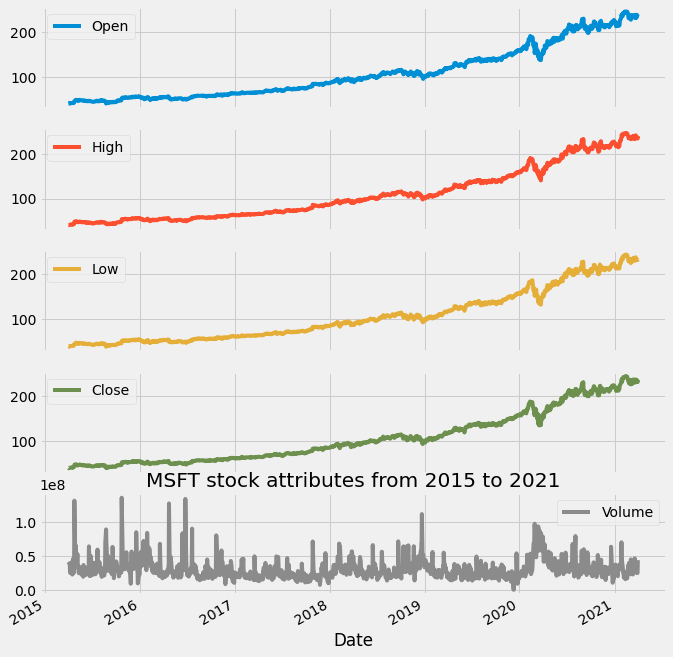

In [ ]:
TS_df['2015':'2021'].plot(subplots=True, figsize=(10,12))
plt.title('MSFT stock attributes from 2015 to 2021')
plt.savefig('stocks.png')

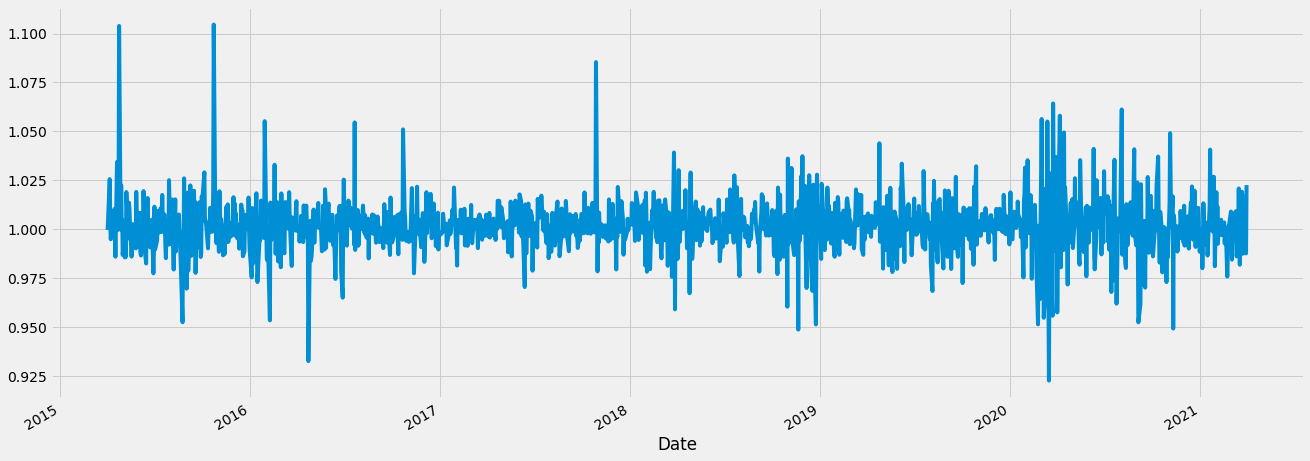

In [ ]:
TS_df['Change'] = TS_df.High.div(TS_df.High.shift())
TS_df['Change'].plot(figsize=(20,8))



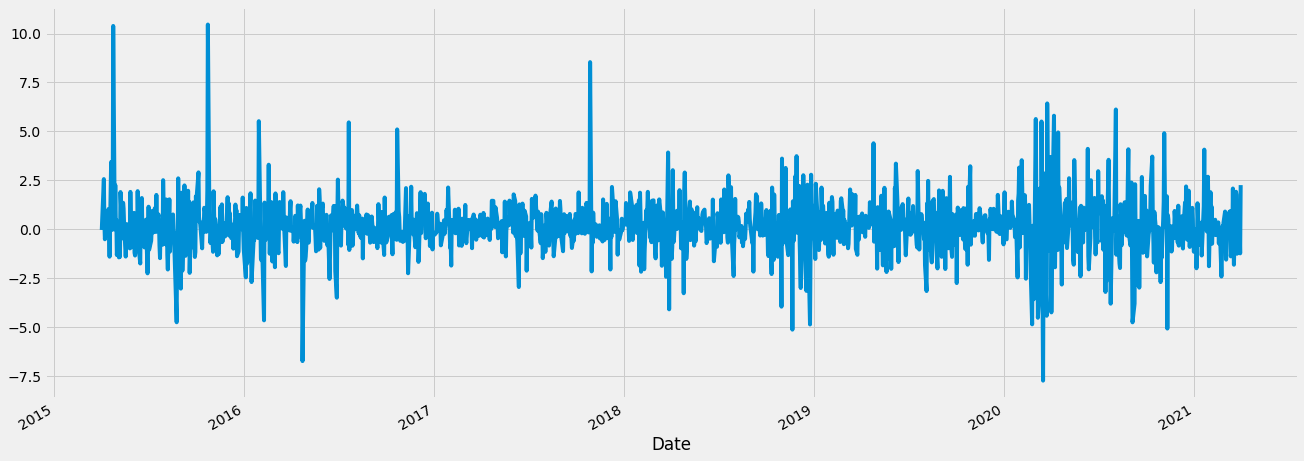

In [ ]:
TS_df['Return'] = TS_df.Change.sub(1).mul(100)
TS_df['Return'].plot(figsize=(20,8))

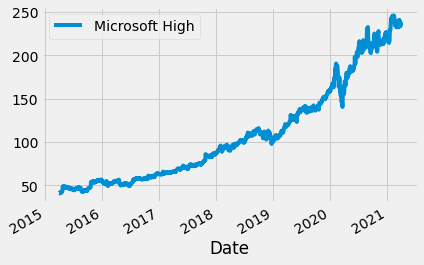

In [ ]:
TS_df.High.plot()
#Nathan_TS_df.Low.plot()
plt.legend(['Microsoft High'])

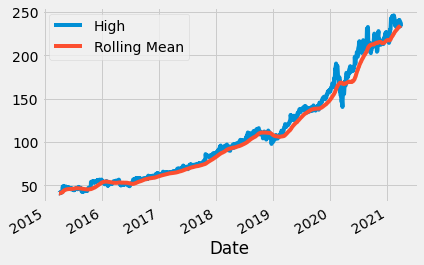

In [ ]:
rolling_MSFT = TS_df.High.rolling('90D').mean()
TS_df.High.plot()
rolling_MSFT.plot()

plt.legend(['High','Rolling Mean'])

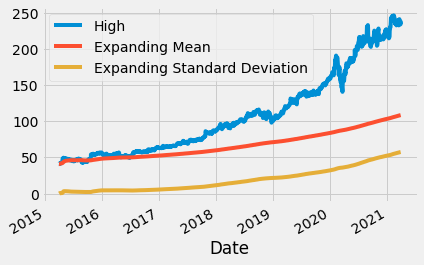

In [ ]:
microsoft_mean = TS_df.High.expanding().mean()
microsoft_std = TS_df.High.expanding().std()
TS_df.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])

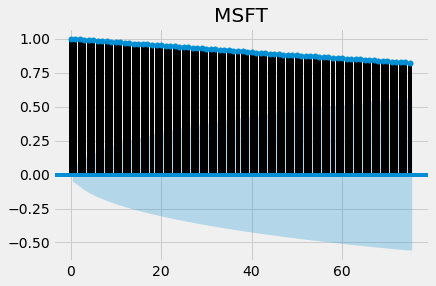

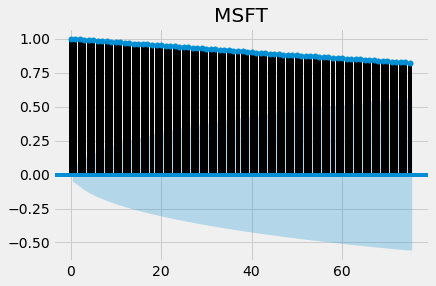

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(TS_df["High"],lags=75,title="MSFT")

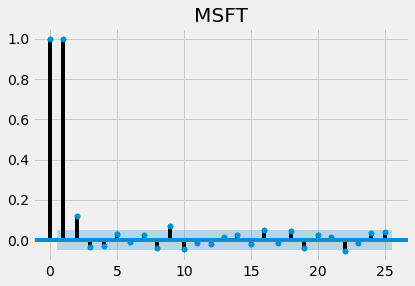

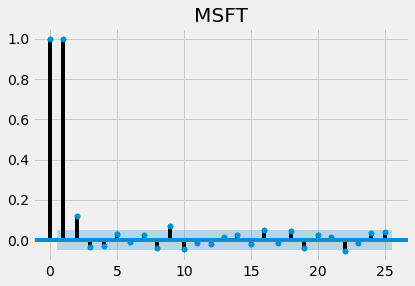

In [ ]:
plot_pacf(TS_df["Close"],lags=25,title="MSFT")

In [ ]:


TS_Monthly_df['dateN']=pd.to_datetime(TS_Monthly_df['Date'])

TS_Monthly_df.set_index('dateN',inplace=True)

TS_Monthly_df.head()

,Date,Open,High,Low,Close,Volume
dateN,,,,,,
2015-04-01 16:00:00,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


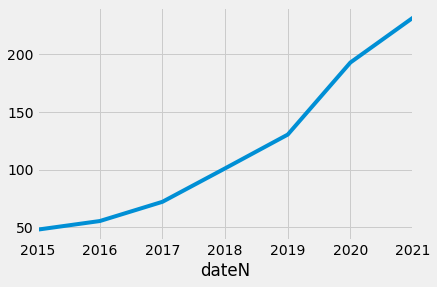

In [ ]:
TS_Monthly_df['Close'].resample('Y').mean().plot()

In [ ]:
TS_Monthly_df.describe()


,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


# Part 2: Data cleaning and feature analysis


## Data Description

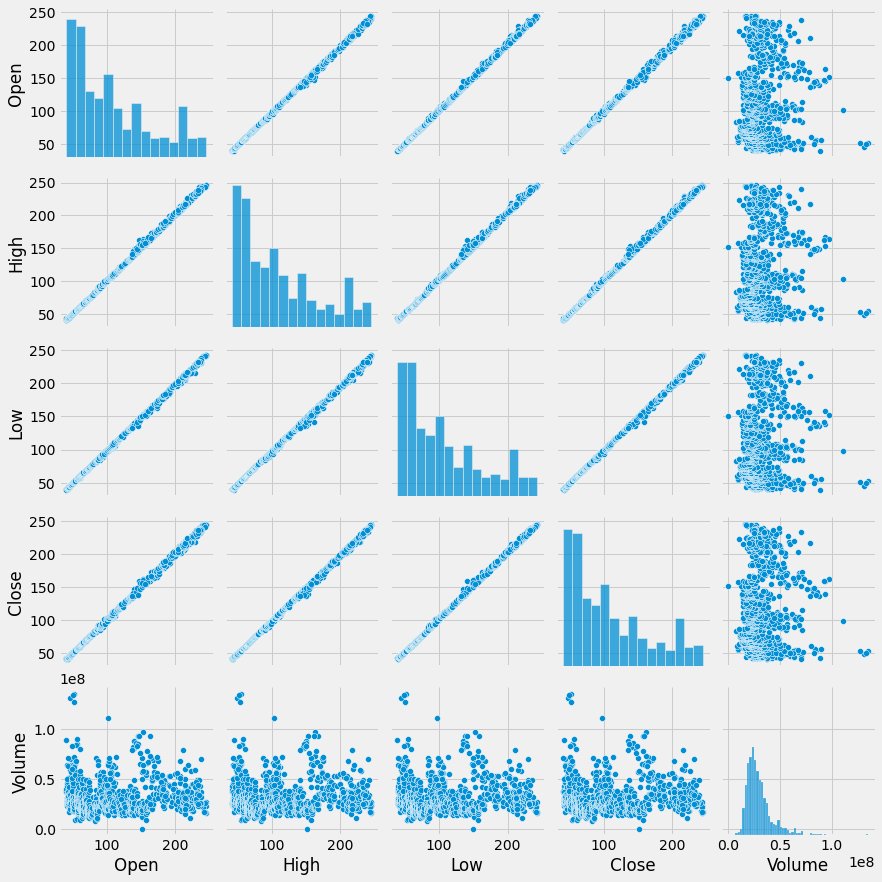

In [ ]:
import seaborn as sns
sns.pairplot(data=TS_Monthly_df)

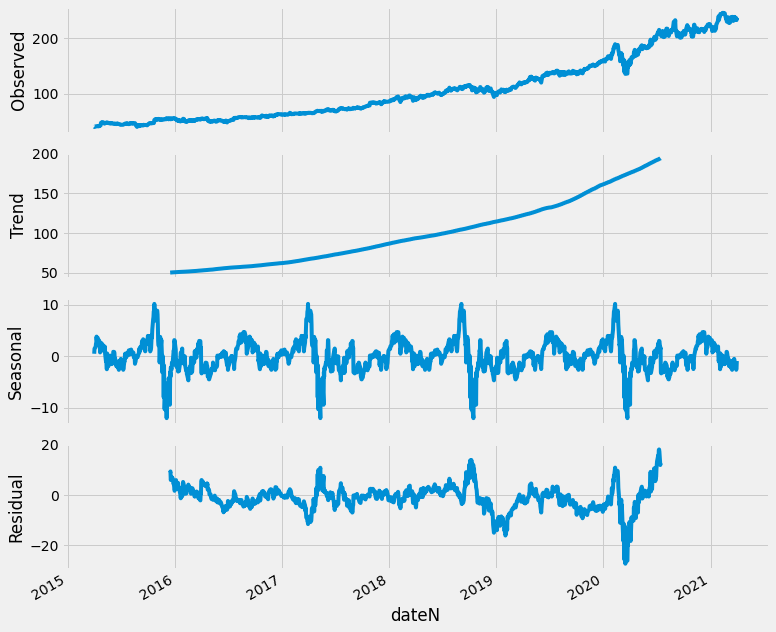

In [ ]:
rcParams['figure.figsize'] = 11, 9
pred_df_sim1_new = sm.tsa.seasonal_decompose(TS_Monthly_df[['Close']],model='additive',freq=360) # The frequncy is annual
pred_df_sim2_full = TS_Monthly_df[['Close']]
figure = pred_df_sim1_new.plot()
plt.show()

In [ ]:
sim1=pred_df_sim1_new.resid.dropna()
sim2 = pred_df_sim2_full.dropna()
#sim2


#Part3: Now Let's try model

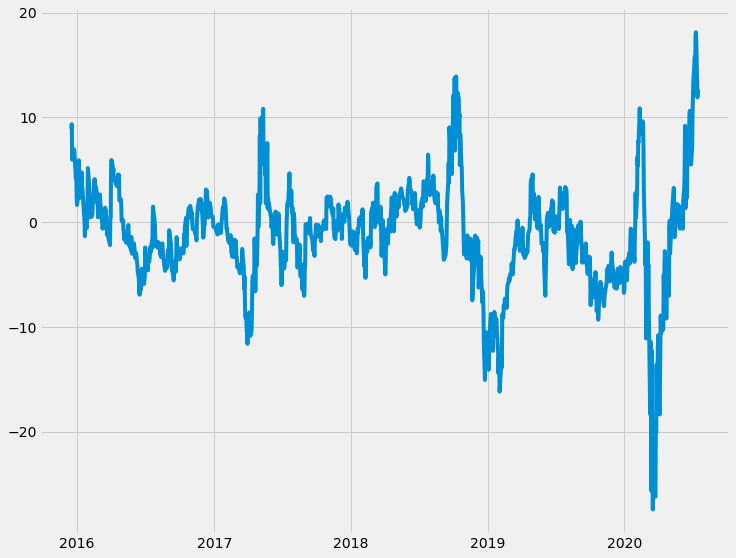

In [ ]:
plt.plot(sim1)

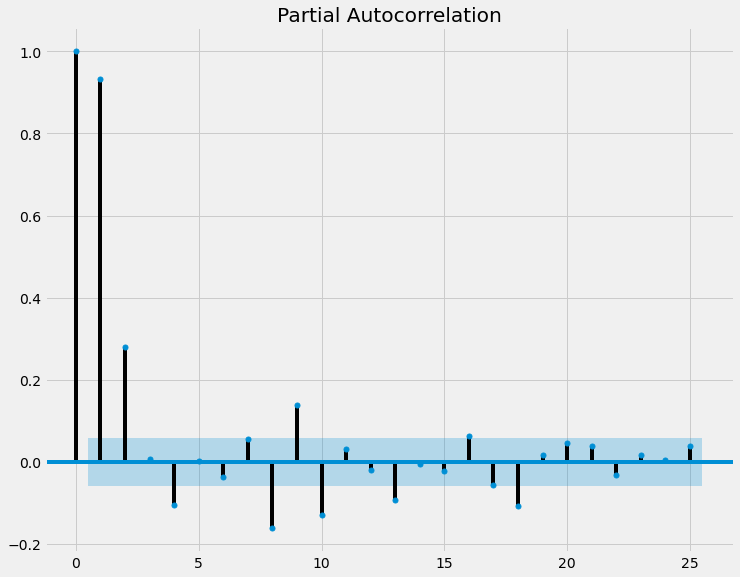

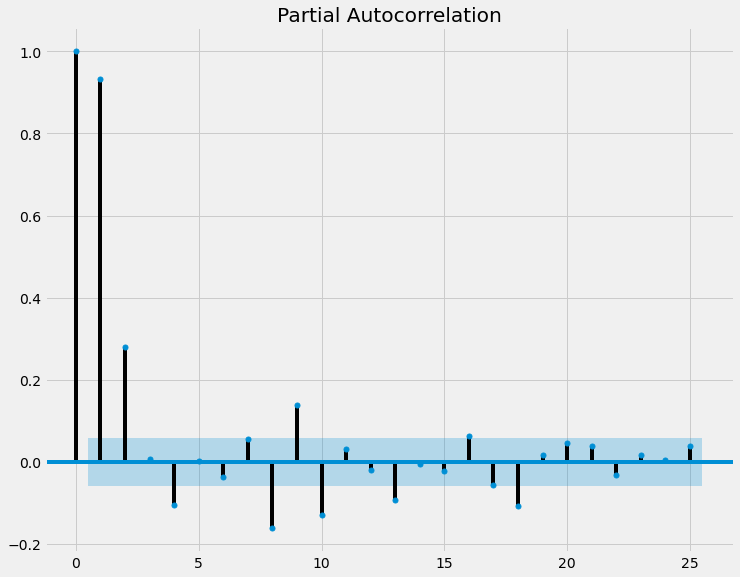

In [ ]:
plot_pacf(sim1, lags=25)

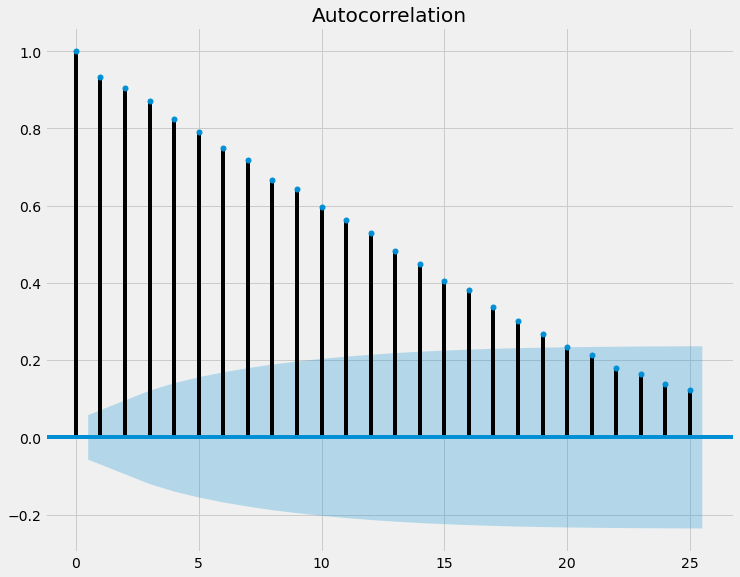

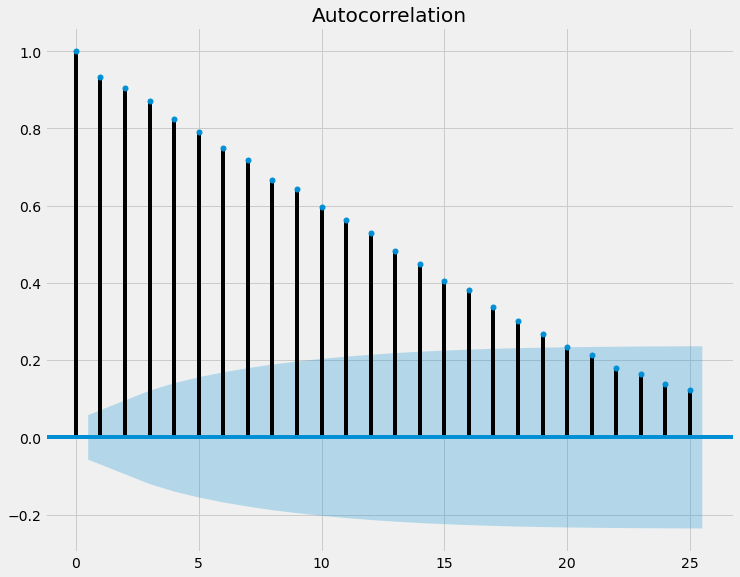

In [ ]:
plot_acf(sim1, lags=25)

In [ ]:
model = ARMA(sim1, order=(2,0))
result = model.fit()


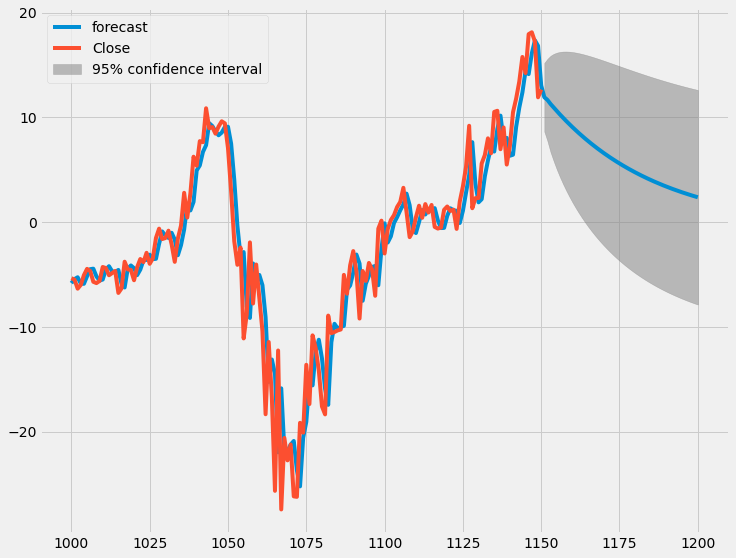

In [ ]:
# Predicting simulated AR(23) model 
result.plot_predict(start=1000, end=1200)
plt.show()

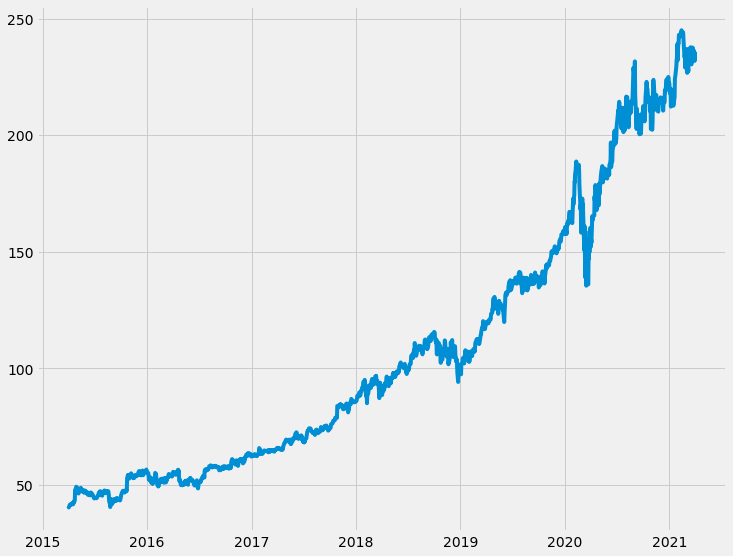

In [ ]:
plt.plot(sim2)

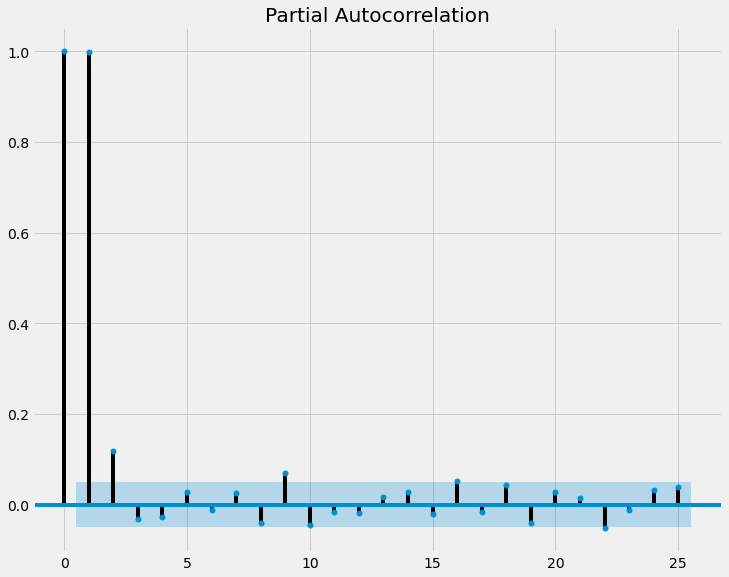

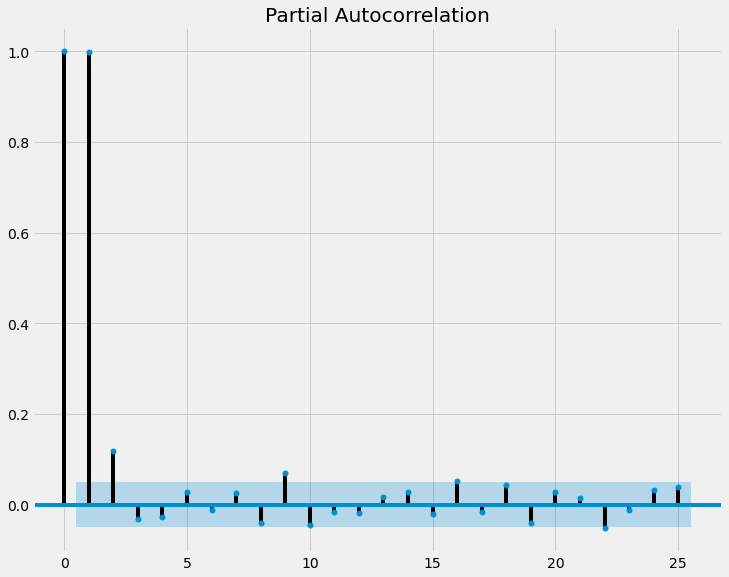

In [ ]:
plot_pacf(sim2, lags=25)

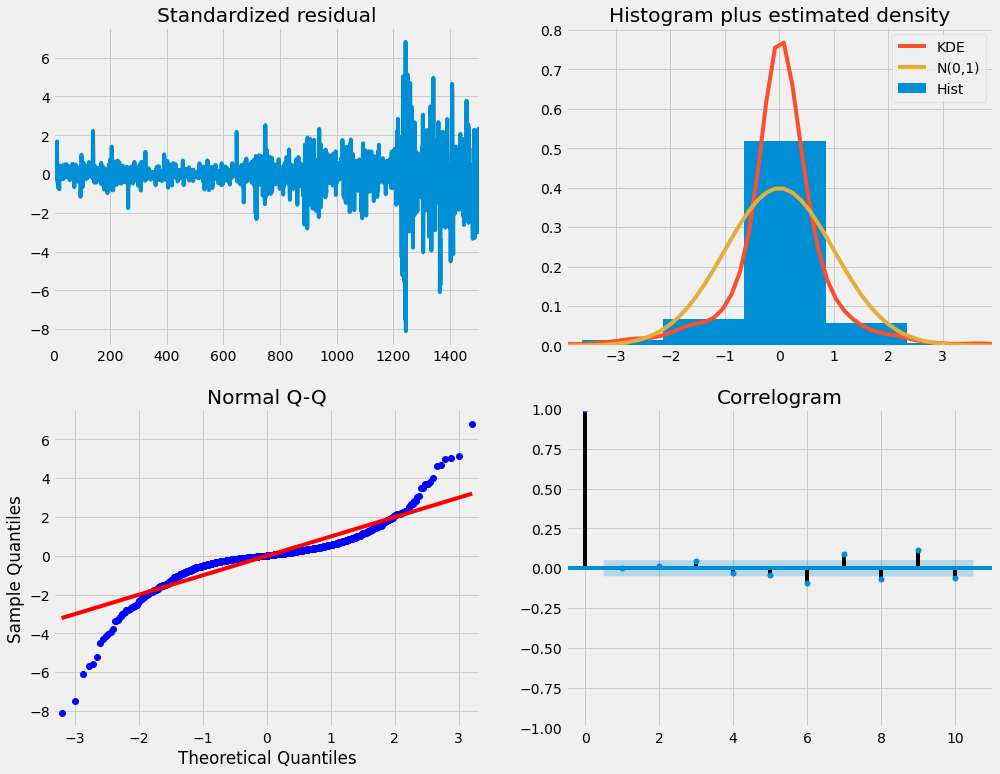

In [ ]:
mod = sm.tsa.statespace.SARIMAX(sim2,
                                order=(2, 3, 2),
				)

MSFTresults = mod.fit()

#print(TSresults.summary().tables[1])

MSFTresults.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = MSFTresults.get_prediction(start=1400, dynamic=False)

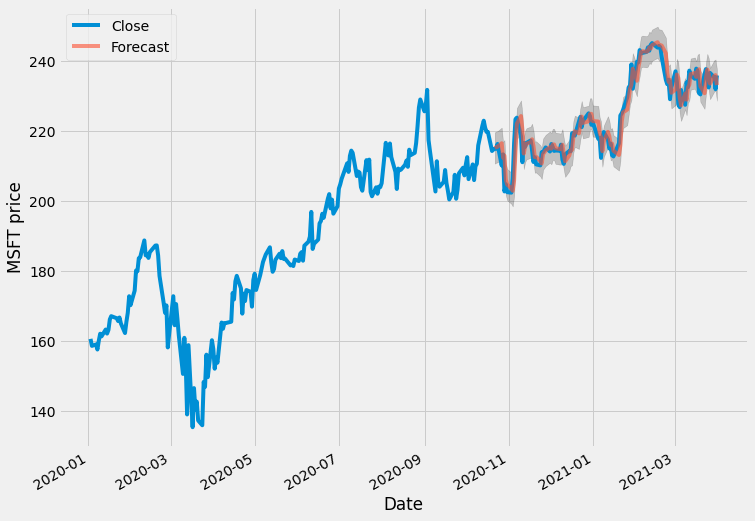

In [ ]:
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters. 

ax = sim2['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('MSFT price')
plt.legend()

plt.show()


In [ ]:
pred = MSFTresults.get_prediction(start=1400, dynamic=True)

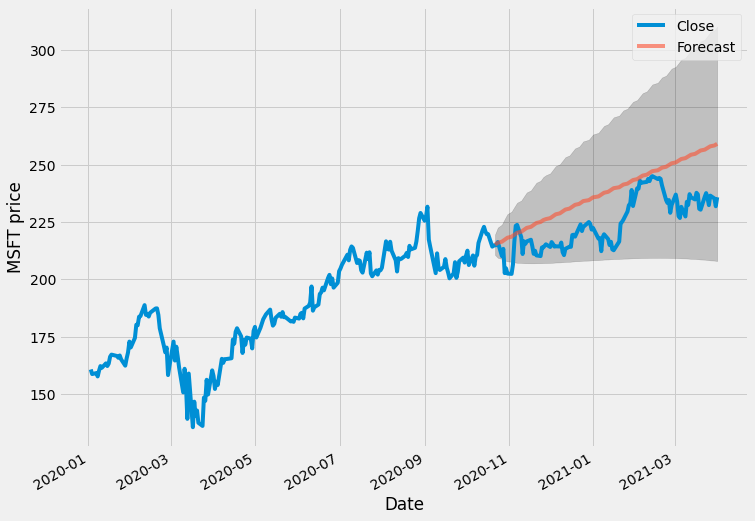

In [ ]:
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters. 

ax = sim2['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('MSFT price')
plt.legend()

plt.show()
